In [15]:
import os
import numpy as np
import pandas as pd

from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def tabulate_events(dpath):
    summary_iterators = [EventAccumulator(os.path.join(dpath, dname)).Reload() for dname in os.listdir(dpath)]
    idx=0
    for i in range(len(summary_iterators)):
        if len(summary_iterators[i].Tags()['scalars'])>0:
            idx=i
    
    tags = summary_iterators[idx].Tags()['scalars']
    print(tags)
#     for it in summary_iterators:
#         assert it.Tags()['scalars'] == tags

    out = defaultdict(list)
    steps = []

    for tag in tags:
        
        
        steps.append([e.step for e in summary_iterators[idx].Scalars(tag)])

#         for events in zip(*[acc.Scalars(tag) for acc in summary_iterators]):
#             assert len(set(e.step for e in events)) == 1

        out[tag].append([e.value for e in summary_iterators[idx].Scalars(tag)])
        out[tag]=np.squeeze(out[tag])

    
    return out, steps


def to_csv(dpath):
    dirs = os.listdir(dpath)

    d, steps = tabulate_events(dpath)
    tags, values= list(d.keys()), list(d.values())
    np_values = np.array(values)
    for index, tag in enumerate(tags):
        df = pd.DataFrame(np_values[index], index=steps[index], columns=[tag])
        df.to_csv(get_file_path(dpath, tag))


def get_file_path(dpath, tag):
    file_name = tag.replace("/", "_") + '.csv'
    folder_path = os.path.join(dpath, 'csv')
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return os.path.join(folder_path, file_name)


path = "models/simple_tag/mmx/run1"
to_csv(path)


['rewards/epi_rew', 'rewards/adv_rew', 'rewards/agent_rew', 'losses/c_loss', 'losses/a_loss']


/tmp/ipykernel_3911794/1645356644.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_values = np.array(values)


35.11718559376895


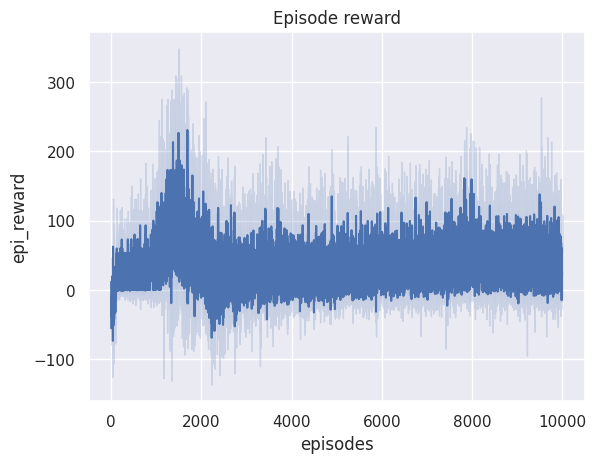

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df1 = pd.read_csv('models/simple_tag/mmx/run2/csv/rewards_epi_rew.csv')
df2 = pd.read_csv('models/simple_tag/mmx/run3/csv/rewards_epi_rew.csv')
df3 = pd.read_csv('models/simple_tag/mmx/run4/csv/rewards_epi_rew.csv')

df1= pd.Series(df1['rewards/epi_rew'].astype(float))
df2= pd.Series(df2['rewards/epi_rew'].astype(float))
df3= pd.Series(df3['rewards/epi_rew'].astype(float))

sns.set()

mean_out = np.mean([df1,df2,df3], axis = 0)
std_out = np.std([df1, df2,df3], axis=0)
step=[s for s in list(range(len(df1)))]

plt.plot(step, mean_out, 'b-', label='mean_1')
plt.fill_between(step, mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
# plt.ylim(0,0.0023)
plt.title("Episode reward")
plt.xlabel("episodes")
plt.ylabel("epi_reward")
print(np.mean(mean_out[-40:]))


59.75


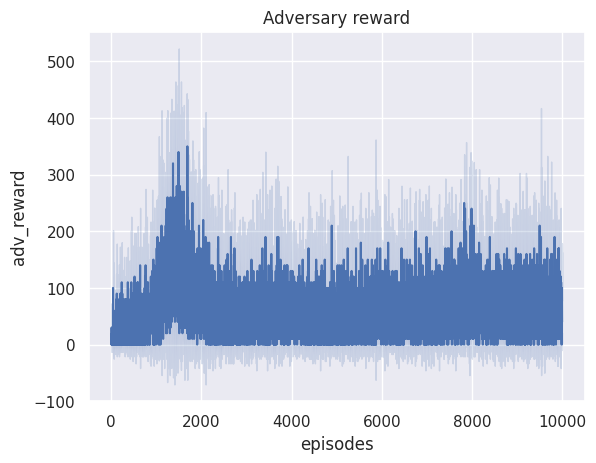

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df1 = pd.read_csv('models/simple_tag/mmx/run2/csv/rewards_adv_rew.csv')
df2 = pd.read_csv('models/simple_tag/mmx/run3/csv/rewards_adv_rew.csv')
df3 = pd.read_csv('models/simple_tag/mmx/run4/csv/rewards_adv_rew.csv')

df1= pd.Series(df1['rewards/adv_rew'].astype(float))
df2= pd.Series(df2['rewards/adv_rew'].astype(float))
df3= pd.Series(df3['rewards/adv_rew'].astype(float))

sns.set()

mean_out = np.mean([df1,df2,df3], axis = 0)
std_out = np.std([df1, df2,df3], axis=0)
step=[s for s in list(range(len(df1)))]

plt.plot(step, mean_out, 'b-', label='mean_1')
plt.fill_between(step, mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
# plt.ylim(0,0.0023)
plt.title("Adversary reward")
plt.xlabel("episodes")
plt.ylabel("adv_reward")
print(np.mean(mean_out[-40:]))


-24.632814406231045


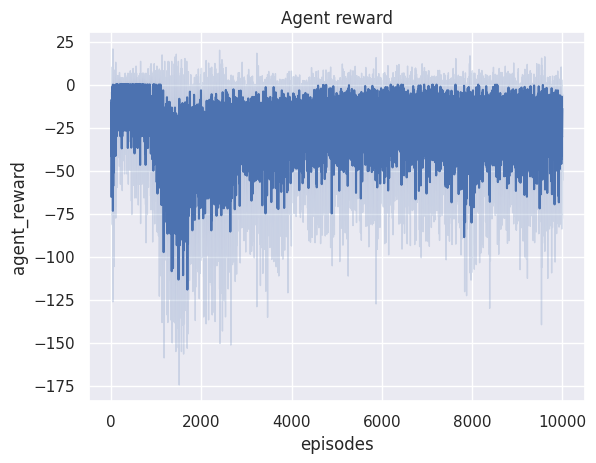

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df1 = pd.read_csv('models/simple_tag/mmx/run2/csv/rewards_agent_rew.csv')
df2 = pd.read_csv('models/simple_tag/mmx/run3/csv/rewards_agent_rew.csv')
df3 = pd.read_csv('models/simple_tag/mmx/run4/csv/rewards_agent_rew.csv')

df1= pd.Series(df1['rewards/agent_rew'].astype(float))
df2= pd.Series(df2['rewards/agent_rew'].astype(float))
df3= pd.Series(df3['rewards/agent_rew'].astype(float))

sns.set()

mean_out = np.mean([df1,df2,df3], axis = 0)
std_out = np.std([df1, df2,df3], axis=0)
step=[s for s in list(range(len(df1)))]

plt.plot(step, mean_out, 'b-', label='mean_1')
plt.fill_between(step, mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
# plt.ylim(0,0.0023)
plt.title("Agent reward")
plt.xlabel("episodes")
plt.ylabel("agent_reward")
print(np.mean(mean_out[-40:]))


1.5225528637568158


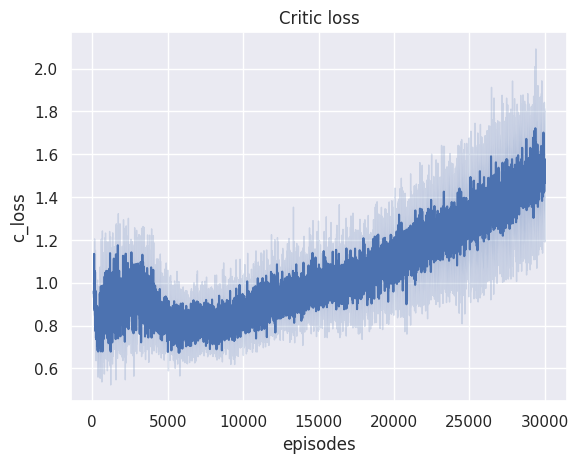

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df1 = pd.read_csv('models/simple_tag/mmx/run2/csv/losses_c_loss.csv')
df2= pd.read_csv('models/simple_tag/mmx/run3/csv/losses_c_loss.csv')
df3= pd.read_csv('models/simple_tag/mmx/run4/csv/losses_c_loss.csv')


df1= pd.Series(df1['losses/c_loss'].astype(float))
df2= pd.Series(df2['losses/c_loss'].astype(float))
df3= pd.Series(df3['losses/c_loss'].astype(float))

sns.set()

mean_out = np.mean([df1,df2,df3], axis = 0)
std_out = np.std([df1, df2,df3], axis=0)
step=[s*4 +100 for s in list(range(len(df1)))]

plt.plot(step, mean_out, 'b-', label='mean_1')
plt.fill_between(step, mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
# plt.ylim(0,0.0023)
plt.title("Critic loss")
plt.xlabel("episodes")
plt.ylabel("c_loss")
print(np.mean(mean_out[-10:]))


-0.10584170192480084


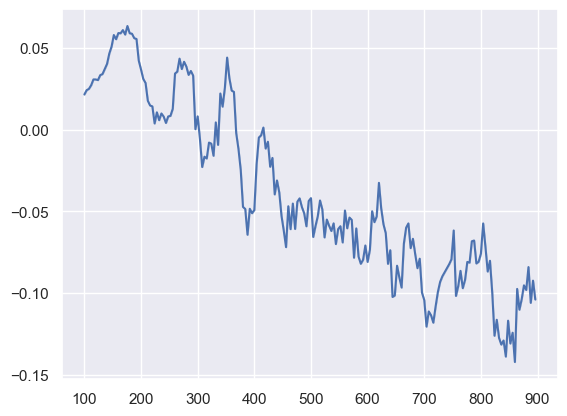

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = pd.read_csv('models/simple_tag/m_m/run2/csv/losses_a_loss.csv')
df2= pd.read_csv('models/simple_tag/m_m/run3/csv/losses_a_loss.csv')
# df3= pd.read_csv('bootmaddpg/0924_1851simple_tag_seed93/csv/agent_critic_loss.csv')


df1= pd.Series(df1['losses/a_loss'].astype(float))[0:200]
df2= pd.Series(df2['losses/a_loss'].astype(float))[0:200]

# df3=pd.Series(df3['agent/critic_loss'].astype(float))

sns.set()

mean_out = np.mean([df1,df2], axis = 0)
std_out = np.std([df1, df2], axis=0)
step=[s*4 +100 for s in list(range(len(df1)))]

plt.plot(step, mean_out, 'b-', label='mean_1')
plt.fill_between(step, mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
# plt.ylim(0,0.0023)
print(np.mean(mean_out[-25:]))

4.593605041503906


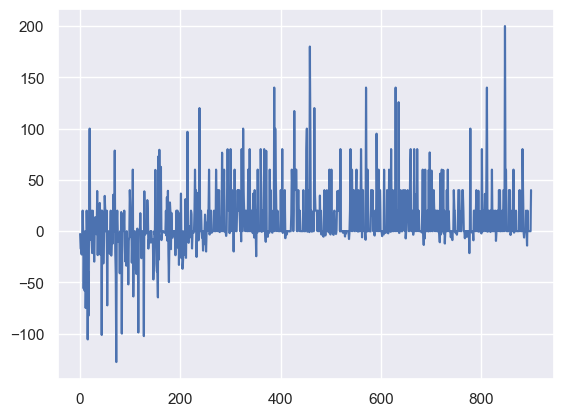

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = pd.read_csv('models/simple_tag/m_m/run2/csv/rewards_epi_rew.csv')
df2= pd.read_csv('models/simple_tag/m_m/run3/csv/rewards_epi_rew.csv')
# df3= pd.read_csv('bootmaddpg/0924_1851simple_tag_seed93/csv/agent_critic_loss.csv')


df1= pd.Series(df1['rewards/epi_rew'].astype(float))[0:900]
df2= pd.Series(df2['rewards/epi_rew'].astype(float))[0:900]

# df3=pd.Series(df3['agent/critic_loss'].astype(float))

sns.set()

mean_out = np.mean([df1,df2], axis = 0)
std_out = np.std([df1, df2], axis=0)
step=[s for s in list(range(len(df1)))]

plt.plot(step, mean_out, 'b-', label='mean_1')
plt.fill_between(step, mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
# plt.ylim(0,0.0023)
print(np.mean(mean_out[-10:]))


23.7


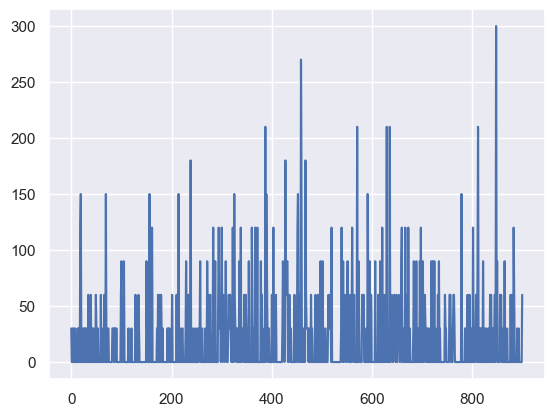

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = pd.read_csv('models/simple_tag/m_m/run2/csv/rewards_adv_rew.csv')
df2= pd.read_csv('models/simple_tag/m_m/run3/csv/rewards_adv_rew.csv')
# df3= pd.read_csv('bootmaddpg/0924_1851simple_tag_seed93/csv/agent_critic_loss.csv')


df1= pd.Series(df1['rewards/adv_rew'].astype(float))[0:900]
df2= pd.Series(df2['rewards/adv_rew'].astype(float))[0:900]

# df3=pd.Series(df3['agent/critic_loss'].astype(float))

sns.set()

mean_out = np.mean([df1,df2], axis = 0)
std_out = np.std([df1, df2], axis=0)
step=[s for s in list(range(len(df1)))]

plt.plot(step, mean_out, 'b-', label='mean_1')
plt.fill_between(step, mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
# plt.ylim(0,0.0023)
print(np.mean(mean_out[-100:]))



-8.483895555920899


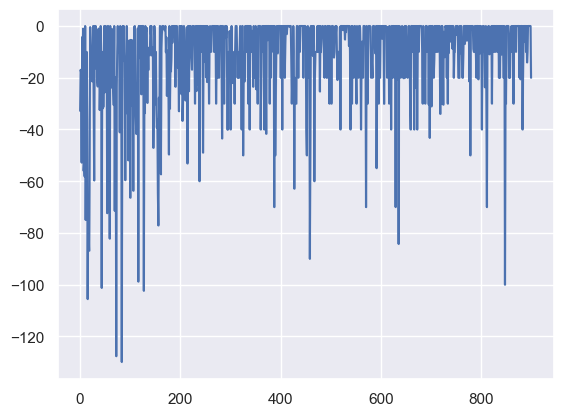

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = pd.read_csv('models/simple_tag/m_m/run2/csv/rewards_agent_rew.csv')
df2= pd.read_csv('models/simple_tag/m_m/run3/csv/rewards_agent_rew.csv')
# df3= pd.read_csv('bootmaddpg/0924_1851simple_tag_seed93/csv/agent_critic_loss.csv')


df1= pd.Series(df1['rewards/agent_rew'].astype(float))[0:900]
df2= pd.Series(df2['rewards/agent_rew'].astype(float))[0:900]

# df3=pd.Series(df3['agent/critic_loss'].astype(float))

sns.set()

mean_out = np.mean([df1,df2], axis = 0)
std_out = np.std([df1, df2], axis=0)
step=[s for s in list(range(len(df1)))]

plt.plot(step, mean_out, 'b-', label='mean_1')
plt.fill_between(step, mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
# plt.ylim(0,0.0023)
print(np.mean(mean_out[-100:]))

